
# COVID-Team-1
### Dr. Mohanty
### Christopher Brantley
### CSC 405 01
### Last Updated: 11/14/2020
### I, Christopher Brantley, have abided by the UNCG academic policy.

In [1]:
# Changing directory so we can import covid_data.
import os 
os.chdir("../")

## Imports.

In [599]:
import ipynb
from IPython.display import Image
from ipynb.fs.full import chris_covid_data as md
from ipynb.fs.full import covid_data as cd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from pandas.plotting import autocorrelation_plot
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.tools.eval_measures as smt
import statistics 
from sklearn import tree as tree
from sklearn.model_selection import train_test_split
from sklearn import metrics

## Pandas Display Options.

In [3]:
# Telling pandas not convert to html tags.
pd.set_option('display.html.table_schema', True)
# Max columns and rows to display.
pd.set_option('display.max_columns', 15)
pd.set_option('display.max_rows', 8)

# Task 1.1: 

In [4]:
df_florida = md.get_state_daily_cases("FL")


In [5]:
def linear_non_models_state(df_data, d_type = ""):
    dict_rmse = {}
    for poly in range(1, 4):
        list_rmse = []
        pre_formula = "daily_type ~ 1 + days_passed"
        for x in range(2, poly + 1):
            #https://www.statsmodels.org/stable/examples/notebooks/generated/predict.html
            pre_formula  += "+ I(days_passed ** {:.1f})".format(x)
        figure = go.Figure()
        for county in df_data.index:
            series_county = df_data.loc[county]
            first_case_idx = 0
            for value in series_county.values:
                if value != 0:
                    break
                first_case_idx += 1
            x_value = len(series_county[first_case_idx:])
            x_values = np.arange(0, x_value)
            y_values = series_county[first_case_idx:].values
            df_daily_data = pd.DataFrame(columns = ["days_passed", "daily_type"],
                                    data = {"days_passed" : x_values.tolist(),
                                            "daily_type" : y_values.tolist(),
                                           })
            df_x = pd.DataFrame({"days_passed" : df_daily_data.index})
            cur_poly = smf.ols(formula = pre_formula,
                               data = df_daily_data,
                              ).fit()
            pred_y = cur_poly.predict(df_x)
            rmse = smt.rmse(df_daily_data.daily_type.values, pred_y)
            list_rmse.append([county, rmse])
            figure.add_trace(go.Scatter(x = df_daily_data.days_passed,
                                        y = pred_y,
                                        mode = "lines",
                                        name = "{} RMSE = {:.2f}".format(county, rmse),
                                       )
                            )
        figure.update_layout(
            title = "Poly n = {}".format(poly),
            xaxis_title = "Days Passed since Initial {}".format(d_type[0].upper() + d_type[1:-1]),
            yaxis_title = "Number of {}".format(d_type[0].upper() + d_type[1:]),
            legend_title = "Models",
        )
        figure.write_image("./chris/images/task1.1/{}{}.png".format(d_type, poly))

        #figure.show()
        dict_rmse[d_type + " " + str(poly)] = list_rmse
    return dict_rmse

In [6]:
def display_rmse(_dict_rmse, d_type, n_type):
    counter = 0
    print("Counties".center(30, " "), "\t", "RMSE (n = {})".format(n_type).center(11, " "), end = "")
    print("Counties".center(30, " "), "\t", "RMSE (n = {})".format(n_type).center(11, " "), "\n")
    for case_rmse in _dict_rmse["{} {}".format(d_type, n_type)]:
        print(case_rmse[0].ljust(30, " "), "{:.2f}".format(case_rmse[1]).rjust(11, " "), end = "\t")
        if(counter % 2 == 1):
            print()
        counter += 1


# Utilize Linear and Non-Linear (polynomial) regression models to compare trends for a single state and its counties. Start your data from the first day of infections. X-Axis, number of days since the first case, Y-Axis number of new cases and deaths. Calcluate error using RMSE.

## Linear/Non-Linear Modeling of New Cases.

In [7]:
dict_cases_rmse = linear_non_models_state(md.get_state_daily_cases("FL"), "cases")

### Linear Modeling (n = 1) of New Cases.

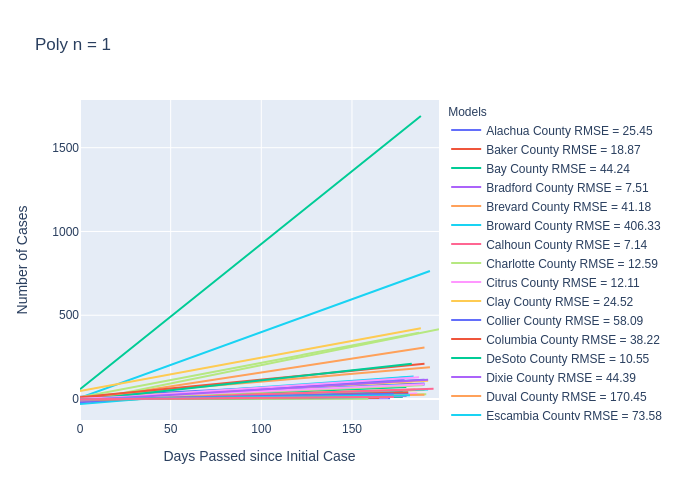

In [8]:
Image(filename = "./chris/images/task1.1/cases1.png")

In [9]:
display_rmse(dict_cases_rmse, "cases", 1)

           Counties            	 RMSE (n = 1)           Counties            	 RMSE (n = 1) 

Alachua County                       25.45	Baker County                         18.87	
Bay County                           44.24	Bradford County                       7.51	
Brevard County                       41.18	Broward County                      406.33	
Calhoun County                        7.14	Charlotte County                     12.59	
Citrus County                        12.11	Clay County                          24.52	
Collier County                       58.09	Columbia County                      38.22	
DeSoto County                        10.55	Dixie County                         44.39	
Duval County                        170.45	Escambia County                      73.58	
Flagler County                        7.31	Franklin County                      10.37	
Gadsden County                       18.48	Gilchrist County                      5.56	
Glades County                        

### Non-linear Modeling (n = 2) of New Cases.

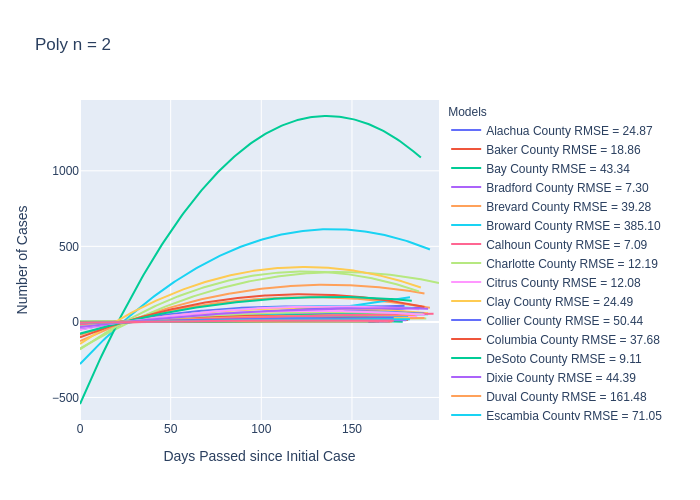

In [10]:
Image(filename = "./chris/images/task1.1/cases2.png")

In [11]:
display_rmse(dict_cases_rmse, "cases", 2)

           Counties            	 RMSE (n = 2)           Counties            	 RMSE (n = 2) 

Alachua County                       24.87	Baker County                         18.86	
Bay County                           43.34	Bradford County                       7.30	
Brevard County                       39.28	Broward County                      385.10	
Calhoun County                        7.09	Charlotte County                     12.19	
Citrus County                        12.08	Clay County                          24.49	
Collier County                       50.44	Columbia County                      37.68	
DeSoto County                         9.11	Dixie County                         44.39	
Duval County                        161.48	Escambia County                      71.05	
Flagler County                        7.31	Franklin County                      10.37	
Gadsden County                       18.44	Gilchrist County                      5.40	
Glades County                        

### Non-linear Modeling (n = 3) of New Cases.

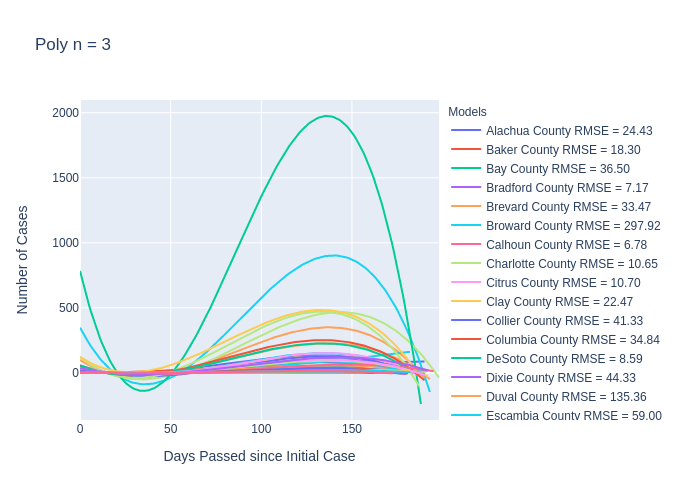

In [12]:
Image(filename = "./chris/images/task1.1/cases3.png")

In [13]:
display_rmse(dict_cases_rmse, "cases", 3)

           Counties            	 RMSE (n = 3)           Counties            	 RMSE (n = 3) 

Alachua County                       24.43	Baker County                         18.30	
Bay County                           36.50	Bradford County                       7.17	
Brevard County                       33.47	Broward County                      297.92	
Calhoun County                        6.78	Charlotte County                     10.65	
Citrus County                        10.70	Clay County                          22.47	
Collier County                       41.33	Columbia County                      34.84	
DeSoto County                         8.59	Dixie County                         44.33	
Duval County                        135.36	Escambia County                      59.00	
Flagler County                        6.91	Franklin County                       9.94	
Gadsden County                       17.24	Gilchrist County                      5.19	
Glades County                        

In [14]:
df_rmse_difference = pd.DataFrame(index = [x[0] for x in dict_cases_rmse["cases 3"]],
                                  columns = ["RMSE_difference"],
                                  dtype = "float64")
for case_3, case_1 in zip(dict_cases_rmse["cases 3"], dict_cases_rmse["cases 1"]):
    df_rmse_difference.loc[case_3[0], "RMSE_difference"] = case_1[1] - case_3[1]
display(df_rmse_difference.T)
print(df_rmse_difference.RMSE_difference.describe())
print()
print("Median: {}".format(df_rmse_difference.RMSE_difference.apply(lambda x: np.round(x, 0))\
      .sort_values(ascending = True).median()))

,Alachua County,Baker County,Bay County,Bradford County,Brevard County,Broward County,Calhoun County,...,Suwannee County,Taylor County,Union County,Volusia County,Wakulla County,Walton County,Washington County
RMSE_difference,1.025164,0.563363,7.747329,0.34277,7.70494,108.408487,0.365885,...,1.368106,0.956417,0.172486,10.761136,0.689542,1.617469,1.173912


count     67.000000
mean      12.533209
std       33.058573
min        0.005637
25%        0.786495
50%        2.058877
75%       10.120211
max      237.758644
Name: RMSE_difference, dtype: float64

Median: 2.0


#### We can see from analysing the RMSE difference that on average we have a 12 unit increase for our mean.
#### We also see that our median is 2, which shows that not many models are benefiting from increased complexity.
#### We also see that our min and max vary largely, the minimum being less than 1 and the max being greater than 200.
#### This implies that as we increase complexity that some graphs are benefitting largely and most are not.
#### Thus we can observe that many of our models become slightly curved but still resemble their linear counterpart while a few become strongly peaked and have larger curves and do not resemble their linear counterpart.

## Linear/Non-Linear Modeling of New Deaths.

In [15]:
dict_deaths_rmse = linear_non_models_state(md.get_state_daily_deaths("FL"), "deaths")

### Linear Modeling (n = 1) of New Deaths.

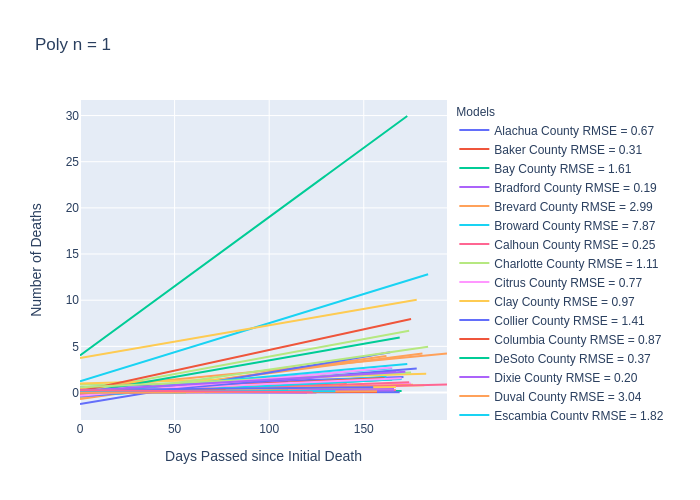

In [16]:
Image(filename = "./chris/images/task1.1/deaths1.png")

In [17]:
display_rmse(dict_deaths_rmse, "deaths", 1)

           Counties            	 RMSE (n = 1)           Counties            	 RMSE (n = 1) 

Alachua County                        0.67	Baker County                          0.31	
Bay County                            1.61	Bradford County                       0.19	
Brevard County                        2.99	Broward County                        7.87	
Calhoun County                        0.25	Charlotte County                      1.11	
Citrus County                         0.77	Clay County                           0.97	
Collier County                        1.41	Columbia County                       0.87	
DeSoto County                         0.37	Dixie County                          0.20	
Duval County                          3.04	Escambia County                       1.82	
Flagler County                        0.39	Franklin County                       0.22	
Gadsden County                        1.01	Gilchrist County                      0.46	
Glades County                        

### Non-linear Modeling (n = 2) of New Deaths.

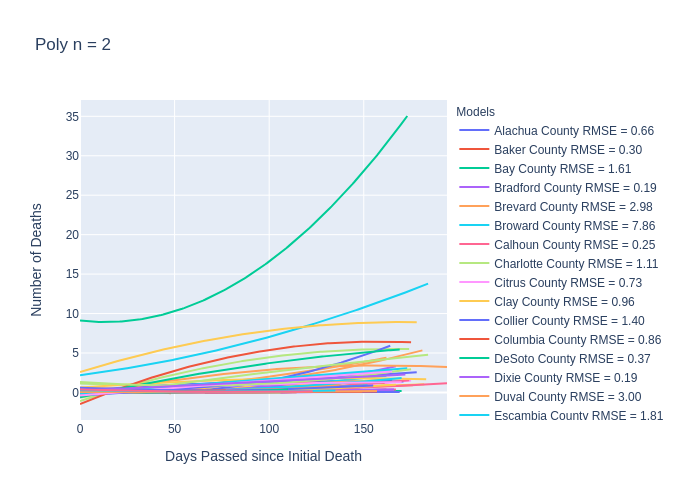

In [18]:
Image(filename = "./chris/images/task1.1/deaths2.png")

In [19]:
display_rmse(dict_deaths_rmse, "deaths", 2)

           Counties            	 RMSE (n = 2)           Counties            	 RMSE (n = 2) 

Alachua County                        0.66	Baker County                          0.30	
Bay County                            1.61	Bradford County                       0.19	
Brevard County                        2.98	Broward County                        7.86	
Calhoun County                        0.25	Charlotte County                      1.11	
Citrus County                         0.73	Clay County                           0.96	
Collier County                        1.40	Columbia County                       0.86	
DeSoto County                         0.37	Dixie County                          0.19	
Duval County                          3.00	Escambia County                       1.81	
Flagler County                        0.39	Franklin County                       0.22	
Gadsden County                        1.01	Gilchrist County                      0.45	
Glades County                        

### Non-linear Modeling (n = 3) of New Deaths.

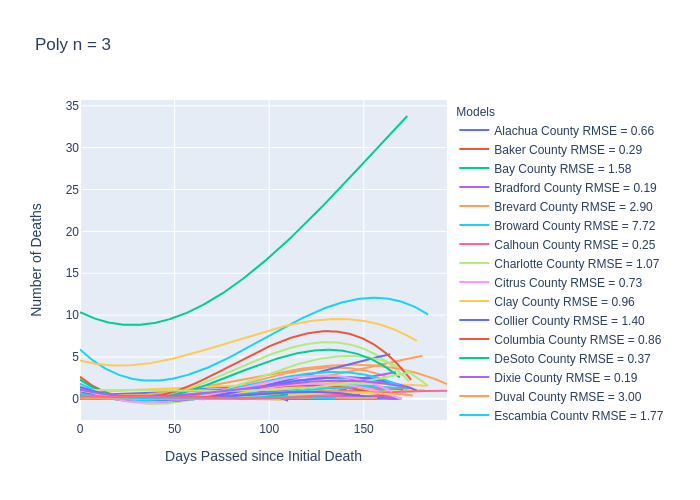

In [20]:
Image(filename = "./chris/images/task1.1/deaths3.png")

In [21]:
display_rmse(dict_deaths_rmse, "deaths", 3)

           Counties            	 RMSE (n = 3)           Counties            	 RMSE (n = 3) 

Alachua County                        0.66	Baker County                          0.29	
Bay County                            1.58	Bradford County                       0.19	
Brevard County                        2.90	Broward County                        7.72	
Calhoun County                        0.25	Charlotte County                      1.07	
Citrus County                         0.73	Clay County                           0.96	
Collier County                        1.40	Columbia County                       0.86	
DeSoto County                         0.37	Dixie County                          0.19	
Duval County                          3.00	Escambia County                       1.77	
Flagler County                        0.39	Franklin County                       0.21	
Gadsden County                        1.01	Gilchrist County                      0.45	
Glades County                        

In [22]:
df_rmse_difference = pd.DataFrame(index = [x[0] for x in dict_deaths_rmse["deaths 3"]],
                                  columns = ["RMSE_difference"],
                                  dtype = "float64")
for death_3, death_1 in zip(dict_deaths_rmse["deaths 3"], dict_deaths_rmse["deaths 1"]):
    df_rmse_difference.loc[death_3[0], "RMSE_difference"] = death_1[1] - death_3[1]
display(df_rmse_difference.T)
print(df_rmse_difference.RMSE_difference.describe())
print()
print("Median: {}".format(df_rmse_difference.RMSE_difference.apply(lambda x: np.round(x, 0))\
      .sort_values(ascending = True).median()))

,Alachua County,Baker County,Bay County,Bradford County,Brevard County,Broward County,Calhoun County,...,Suwannee County,Taylor County,Union County,Volusia County,Wakulla County,Walton County,Washington County
RMSE_difference,0.006124,0.021917,0.036467,0.005522,0.088289,0.148008,0.003861,...,0.06877,0.0025,0.018512,0.036759,0.004814,0.008457,0.005328


count    67.000000
mean      0.046617
std       0.064669
min       0.000498
25%       0.004855
50%       0.021917
75%       0.057279
max       0.354960
Name: RMSE_difference, dtype: float64

Median: 0.0


#### From analysing the RMSE difference we see that on average we had a .04 unit increase for our mean.
#### We see that our median is a value of 0 due to no value being over 1.
####  We see that our min is .0004 and that our max is .35 which is a 875% increase (larger than cases).
#### Because the 25% quartile and top 75 quartile vary similarly as with the cases we will imply the following.
#### That some models are benefitting largely from the increase in complexity but that a majority are not.

# Task 1.2: 

In [23]:
df_florida = md.get_state_daily_cases("FL")

In [24]:
def linear_non_models_county(_county, _df_data, d_type):
    dict_return_stats = {}
    dict_return_rmse = {}
    figure = go.Figure()
    series_county = _df_data.loc[_county]
    first_case_idx = 0
    for value in series_county.values:
        if value != 0:
            break
        first_case_idx += 1
    x_value = len(series_county[first_case_idx:])
    x_values = np.arange(0, x_value)
    y_values = series_county[first_case_idx:].values
    df_daily_data = pd.DataFrame(columns = ["days_passed", "daily_type"],
                                 data = {"days_passed" : x_values.tolist(),
                                         "daily_type" : y_values.tolist(),
                                        })
    df_x = pd.DataFrame({"days_passed" : df_daily_data.index})
    figure.add_trace(go.Scatter(x = df_daily_data["days_passed"], 
                                y = df_daily_data["daily_type"],
                                mode = "markers",
                                name = "Actual Data")
                    )
    temp_dict = {}
    for poly in range(1, 4):
        pre_formula = "daily_type ~ 1 + days_passed"
        for x in range(2, poly + 1):
            #https://www.statsmodels.org/stable/examples/notebooks/generated/predict.html
            pre_formula  += "+ I(days_passed ** {:.1f})".format(x)
        cur_poly = smf.ols(formula = pre_formula,
                           data = df_daily_data,
                          ).fit()
        pred_y = cur_poly.predict(df_x)
        rmse = smt.rmse(df_daily_data.daily_type.values, pred_y)
        temp_dict[poly] = rmse
        figure.add_trace(go.Scatter(x = df_daily_data.days_passed,
                                    y = pred_y,
                                    mode = "lines",
                                    name = "{} (n = {}) RMSE = {:.2f}".format(_county, poly, rmse),
                                   )
                        )
        form_x = df_daily_data.days_passed[50]
        form_y = pred_y[50]
        form_b = float(str(cur_poly.summary().tables[1][1][1]))
        rsquared = cur_poly.rsquared
        if (poly == 1):
            dict_return_stats[_county + "_" + d_type + "_" + str(poly)] =\
            {"slope" : (form_y - form_b) / form_x,
             "R2" : rsquared}
        else:
            dict_return_stats[_county + "_" + d_type + "_" + str(poly)] =\
            {"skew" : float(str(cur_poly.summary().tables[2][2][1])),
             "Kurtosis" : float(str(cur_poly.summary().tables[2][3][1])),
             "R2" : rsquared}
    figure.update_layout(
        title = "Linear/Non-Linear Models - {}".format(_county),
        xaxis_title = "Days Passed since Initial {}".format(d_type[0].upper() + d_type[1:-1]),
        yaxis_title = "Number of {}".format(d_type[0].upper() + d_type[1:]),
        legend_title = "Models",
    )
    dict_return_rmse[_county + " " + d_type] = temp_dict
    figure.write_image("./chris/images/task1.2/{}-{}.png".format(_county, d_type))
    #figure.show()
    return dict_return_stats, dict_return_rmse

In [25]:
top_5_counties = ["Miami-Dade County", "Broward County", "Palm Beach County",
                  "Orange County", "Hillsborough County"]
dict_stats = {}
dict_rmse = {}
for dtype, df_data in zip(["cases", "deaths"], [md.get_state_daily_cases("FL"),
                                             md.get_state_daily_deaths("FL")]):
    for county in top_5_counties:
        dict_temp_stats, dict_temp_rmse = linear_non_models_county(county, df_data, dtype)
        dict_stats = {**dict_stats, **dict_temp_stats}
        dict_rmse = {**dict_rmse, **dict_temp_rmse}

# Identify which counties are most at risk. Model for top 5 counties with cases within a state and observe their trends.

#### For Poly n = 1 cases: Miami-Dade County, Broward County, Palm Beach County, Orange County, Hillsborough County are top performers.
#### For Poly n = 2 cases: Miami-Dade County, Broward County, Palm Beach County, Orange County, Hillsborough County are top performers.
#### For Poly n = 3 cases: Miami-Dade County, Broward County, Palm Beach County, Orange County, Hillsborough County are top performers.

### So we can tell that Miami-Dade County, Broward County, Palm Beach County, Orange County, Hillsborough County are our top performers in all models. This means that these counties are at most risk.

## Models of Top Performing Counties by Cases

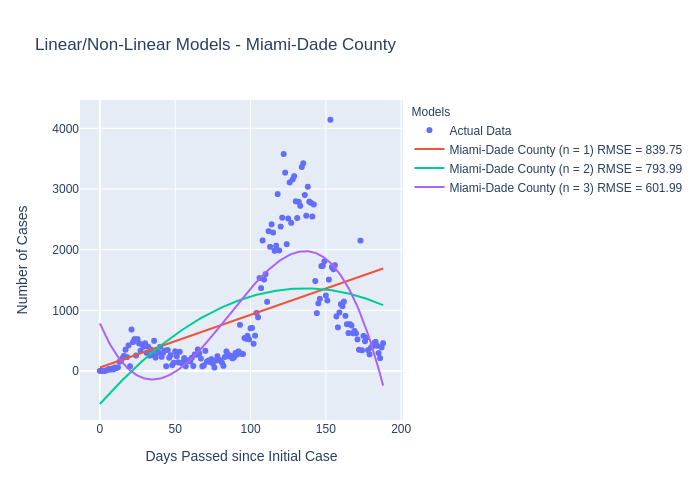

In [26]:
Image(filename = "./chris/images/task1.2/Miami-Dade County-cases.png")

In [27]:
slope = dict_stats["Miami-Dade County_cases_1"]["slope"]
rsquared = dict_stats["Miami-Dade County_cases_1"]["R2"]
print("Stats of n = 1: slope: {:.2f}    R2: {:.2f}".format(slope, rsquared))

Stats of n = 1: slope: 8.67    R2: 0.24


In [28]:
print("Stats of n = 2: ", dict_stats["Miami-Dade County_cases_2"])

Stats of n = 2:  {'skew': 0.974, 'Kurtosis': 3.382, 'R2': 0.3214561581514158}


In [29]:
print("Stats of n = 3: ", dict_stats["Miami-Dade County_cases_3"])

Stats of n = 3:  {'skew': 0.654, 'Kurtosis': 3.407, 'R2': 0.609948359239681}


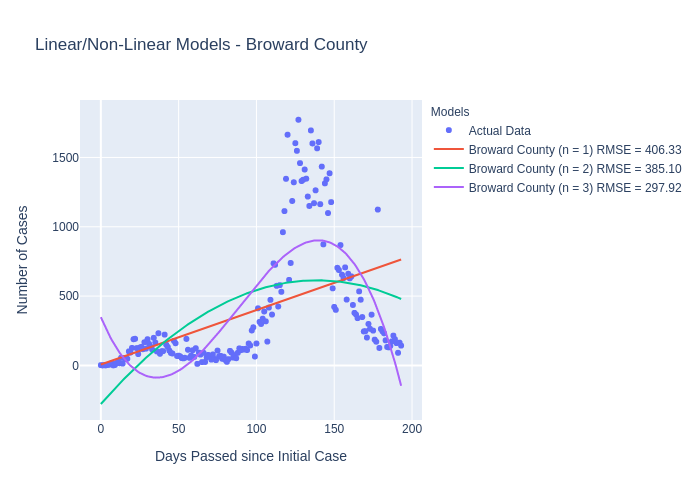

In [30]:
Image(filename = "./chris/images/task1.2/Broward County-cases.png")

In [31]:
slope = dict_stats["Broward County_cases_1"]["slope"]
rsquared = dict_stats["Broward County_cases_1"]["R2"]
print("Stats of n = 1: slope: {:.2f}    R2: {:.2f}".format(slope, rsquared))

Stats of n = 1: slope: 3.92    R2: 0.23


In [32]:
print("Stats of n = 2: ", dict_stats["Broward County_cases_2"])

Stats of n = 2:  {'skew': 1.119, 'Kurtosis': 3.524, 'R2': 0.30499297189877783}


In [33]:
print("Stats of n = 3: ", dict_stats["Broward County_cases_3"])

Stats of n = 3:  {'skew': 0.747, 'Kurtosis': 3.115, 'R2': 0.5840641551057995}


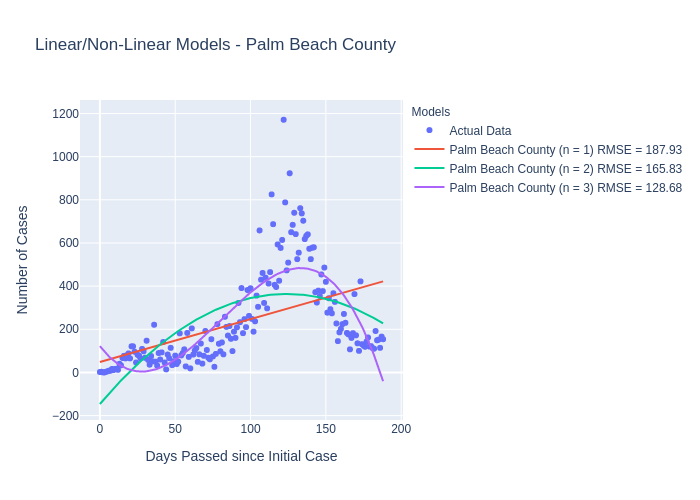

In [34]:
Image(filename = "./chris/images/task1.2/Palm Beach County-cases.png")

In [35]:
slope = dict_stats["Palm Beach County_cases_1"]["slope"]
rsquared = dict_stats["Palm Beach County_cases_1"]["R2"]
print("Stats of n = 1: slope: {:.2f}    R2: {:.2f}".format(slope, rsquared))

Stats of n = 1: slope: 1.99    R2: 0.25


In [36]:
print("Stats of n = 2: ", dict_stats["Palm Beach County_cases_2"])

Stats of n = 2:  {'skew': 1.316, 'Kurtosis': 5.708, 'R2': 0.4159173317148511}


In [37]:
print("Stats of n = 3: ", dict_stats["Palm Beach County_cases_3"])

Stats of n = 3:  {'skew': 1.36, 'Kurtosis': 7.317, 'R2': 0.6483000537955376}


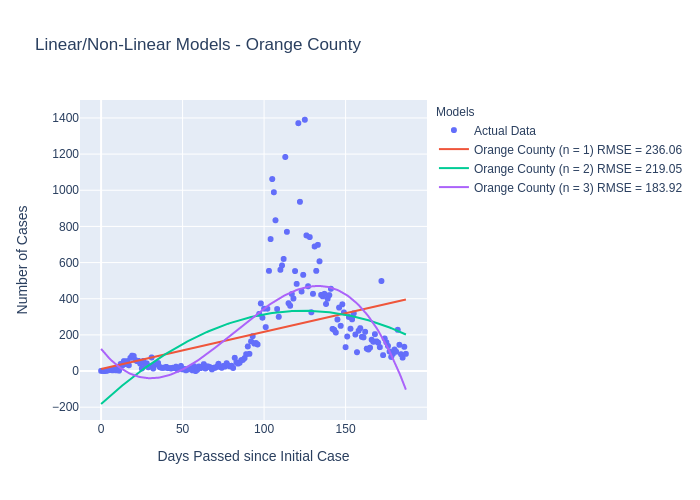

In [38]:
Image(filename = "./chris/images/task1.2/Orange County-cases.png")

In [39]:
slope = dict_stats["Orange County_cases_1"]["slope"]
rsquared = dict_stats["Orange County_cases_1"]["R2"]
print("Stats of n = 1: slope: {:.2f}    R2: {:.2f}".format(slope, rsquared))

Stats of n = 1: slope: 2.06    R2: 0.18


In [40]:
print("Stats of n = 2: ", dict_stats["Orange County_cases_2"])

Stats of n = 2:  {'skew': 2.084, 'Kurtosis': 9.078, 'R2': 0.2960354797600053}


In [41]:
print("Stats of n = 3: ", dict_stats["Orange County_cases_3"])

Stats of n = 3:  {'skew': 2.341, 'Kurtosis': 11.013, 'R2': 0.5037379296778675}


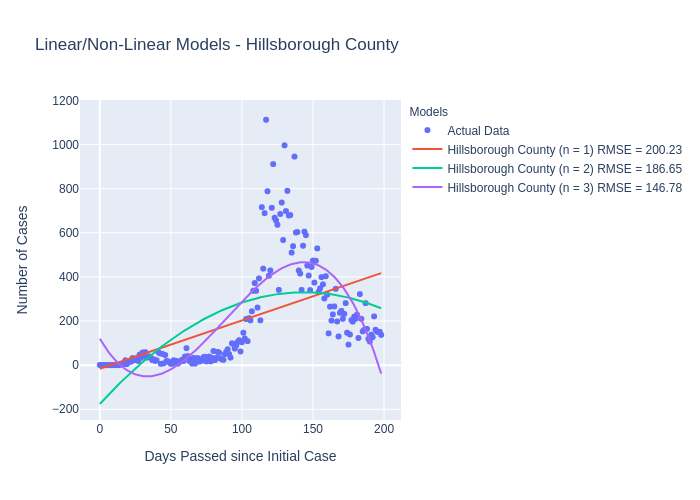

In [42]:
Image(filename = "./chris/images/task1.2/Hillsborough County-cases.png")

In [43]:
slope = dict_stats["Hillsborough County_cases_1"]["slope"]
rsquared = dict_stats["Hillsborough County_cases_1"]["R2"]
print("Stats of n = 1: slope: {:.2f}    R2: {:.2f}".format(slope, rsquared))

Stats of n = 1: slope: 2.19    R2: 0.28


In [44]:
print("Stats of n = 2: ", dict_stats["Hillsborough County_cases_2"])

Stats of n = 2:  {'skew': 1.403, 'Kurtosis': 5.312, 'R2': 0.37697213616098424}


In [45]:
print("Stats of n = 3: ", dict_stats["Hillsborough County_cases_3"])

Stats of n = 3:  {'skew': 1.43, 'Kurtosis': 6.745, 'R2': 0.6147080776128784}


#### The graphs are listed in suspected descending order of performance, in other words, highest to lowest risk.

In [46]:
slope_sum = []
r2_sum = []
for county in top_5_counties:
    slope = (dict_stats[county + "_cases_1"]["slope"])
    r2 = dict_stats[county + "_cases_1"]["R2"]
    print((county + " n = 1 stats: ").ljust(35, " "), "slope: {:.2f}    R2 {:.2f}".format(slope, r2))
    slope_sum.append(slope)
    r2_sum.append(r2)
avg_slope = sum(slope_sum) / len(slope_sum)
avg_r2 = sum(r2_sum) / len(r2_sum)
print()
print("Average n = 1 stats: ".ljust(35, " "), "slope: {:.2f}    R2 {:.2f}".format(avg_slope, avg_r2))

Miami-Dade County n = 1 stats:      slope: 8.67    R2 0.24
Broward County n = 1 stats:         slope: 3.92    R2 0.23
Palm Beach County n = 1 stats:      slope: 1.99    R2 0.25
Orange County n = 1 stats:          slope: 2.06    R2 0.18
Hillsborough County n = 1 stats:    slope: 2.19    R2 0.28

Average n = 1 stats:                slope: 3.77    R2 0.24


#### From analyzing the n = 1 slopes we can see that we are somewhat correct in our ranking. We determined our ranking by peakedness but can see from the graphs that some counties peak and when they level off are at a higher number of cases, we have overvalued peakness. 
#### We see that our average slope is around 4, and that our top performer here is Miami-Dade county. We see that our model from Palm Beach County has the highest R2 and is therefore it's model has the best fit.

In [47]:
list_sum_skew = []
list_sum_kurtosis = []
list_sum_r2 = []
for county in top_5_counties:
    skew = dict_stats[county + "_cases_2"]["skew"]
    kurtosis = dict_stats[county + "_cases_2"]["Kurtosis"]
    r2 = dict_stats[county + "_cases_2"]["R2"]
    print((county + " n = 2 stats: ").ljust(35, " ") + "skew: {:.2f}    kurtosis: {:.2f}    R2: {:.2f}"\
          .format(skew, kurtosis, r2))
    list_sum_skew.append(skew)
    list_sum_kurtosis.append(kurtosis)
    list_sum_r2.append(r2)
avg_skew = sum(list_sum_skew) / len(list_sum_skew)
avg_kurtosis = sum(list_sum_kurtosis) / len(list_sum_kurtosis)
avg_r2 = sum(list_sum_r2) / len(list_sum_r2)
print()
print("Average Stats: ".ljust(35, " ") + "skew: {:.2f}    kurtosis: {:.2f}    R2: {:.2f}"\
      .format(avg_skew, avg_kurtosis, avg_r2))

Miami-Dade County n = 2 stats:     skew: 0.97    kurtosis: 3.38    R2: 0.32
Broward County n = 2 stats:        skew: 1.12    kurtosis: 3.52    R2: 0.30
Palm Beach County n = 2 stats:     skew: 1.32    kurtosis: 5.71    R2: 0.42
Orange County n = 2 stats:         skew: 2.08    kurtosis: 9.08    R2: 0.30
Hillsborough County n = 2 stats:   skew: 1.40    kurtosis: 5.31    R2: 0.38

Average Stats:                     skew: 1.38    kurtosis: 5.40    R2: 0.34


#### From analysing the n = 2 stats we can see that the skew becomes more positive as we move down our list of counties (with outlier of Orange County), meaning the graphs are increasingly skewed to the right .

#### We also see a general increase in the kurtosis (with exception of Hillsborough County), meaning the graph's tails are having a higher impact on the prediction.

#### These results could imply how succesfull a county was in curbing their peak outbreak, that some counties had a more severe peak. The more drastic the difference between tails and peak can be seen here by how it affects the model's overall predictions.

#### Our conclusion is that as the peak increases that the models predictions become worse. Palm Beach is our best performer here and has the smaller difference between peak daily cases and average daily cases.

In [48]:
list_sum_skew = []
list_sum_kurtosis = []
list_sum_r2 = []
for county in top_5_counties:
    skew = dict_stats[county + "_cases_3"]["skew"]
    kurtosis = dict_stats[county + "_cases_3"]["Kurtosis"]
    r2 = dict_stats[county + "_cases_3"]["R2"]
    print((county + " n = 3 stats: ").ljust(35, " ") + "skew: {:.2f}    kurtosis: {:.2f}    R2: {:.2f}"\
          .format(skew, kurtosis, r2))
    list_sum_skew.append(skew)
    list_sum_kurtosis.append(kurtosis)
    list_sum_r2.append(r2)
avg_skew = sum(list_sum_skew) / len(list_sum_skew)
avg_kurtosis = sum(list_sum_kurtosis) / len(list_sum_kurtosis)
avg_r2 = sum(list_sum_r2) / len(list_sum_r2)
print()
print("Average Stats: ".ljust(35, " ") + "skew: {:.2f}    kurtosis: {:.2f}    R2: {:.2f}"\
      .format(avg_skew, avg_kurtosis, avg_r2))

Miami-Dade County n = 3 stats:     skew: 0.65    kurtosis: 3.41    R2: 0.61
Broward County n = 3 stats:        skew: 0.75    kurtosis: 3.12    R2: 0.58
Palm Beach County n = 3 stats:     skew: 1.36    kurtosis: 7.32    R2: 0.65
Orange County n = 3 stats:         skew: 2.34    kurtosis: 11.01    R2: 0.50
Hillsborough County n = 3 stats:   skew: 1.43    kurtosis: 6.75    R2: 0.61

Average Stats:                     skew: 1.31    kurtosis: 6.32    R2: 0.59


#### From analysing the n = 3 stats we see that the skew becomes more positive and that the kurtosis becomes more positive as we move down the list (with some exceptions/outliers).

#### We see that Palm Beach county has the best R2 value and that its model fits the data much better. We see a higher than average kurtosis here and that as we add more inputs that the model is better able to predict the data.

In [49]:
for county in top_5_counties:
    rmse1 = dict_rmse[county + " cases"][1]
    rmse2 = dict_rmse[county + " cases"][2]
    rmse3 = dict_rmse[county + " cases"][3]
    print((county + " RMSE: ").ljust(30, " "), "(n = 1): {:.2f}    (n = 2): {:.2f}    (n = 3): {:.2f}"\
          .format(rmse1, rmse2, rmse3))

Miami-Dade County RMSE:        (n = 1): 839.75    (n = 2): 793.99    (n = 3): 601.99
Broward County RMSE:           (n = 1): 406.33    (n = 2): 385.10    (n = 3): 297.92
Palm Beach County RMSE:        (n = 1): 187.93    (n = 2): 165.83    (n = 3): 128.68
Orange County RMSE:            (n = 1): 236.06    (n = 2): 219.05    (n = 3): 183.92
Hillsborough County RMSE:      (n = 1): 200.23    (n = 2): 186.65    (n = 3): 146.78


#### For the RMSE we can see that in all cases that as the complexity of the model increases that the fit becomes better.

## Models of Top Performing Counties by Deaths

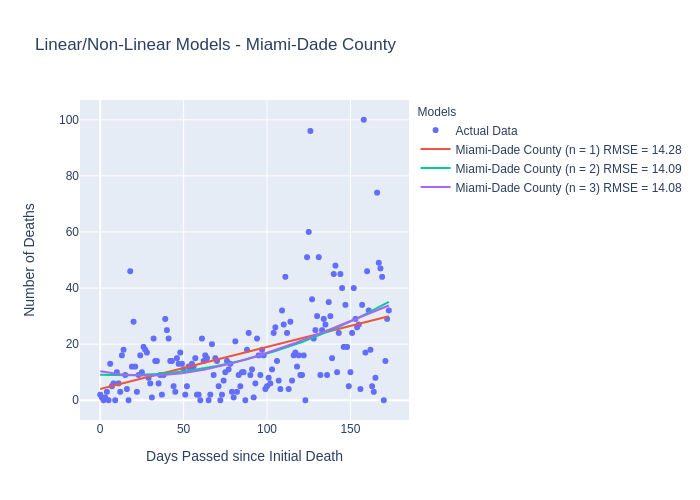

In [50]:
Image(filename = "./chris/images/task1.2/Miami-Dade County-deaths.png")

In [51]:
slope = dict_stats["Miami-Dade County_deaths_1"]["slope"]
rsquared = dict_stats["Miami-Dade County_deaths_1"]["R2"]
print("Stats of n = 1: slope: {:.2f}    R2: {:.2f}".format(slope, rsquared))

Stats of n = 1: slope: 0.15    R2: 0.22


In [52]:
print("Stats of n = 2: ", dict_stats["Miami-Dade County_deaths_2"])

Stats of n = 2:  {'skew': 1.741, 'Kurtosis': 10.0, 'R2': 0.23817335673548523}


In [53]:
print("Stats of n = 3: ", dict_stats["Miami-Dade County_deaths_3"])

Stats of n = 3:  {'skew': 1.735, 'Kurtosis': 9.885, 'R2': 0.2391041223536221}


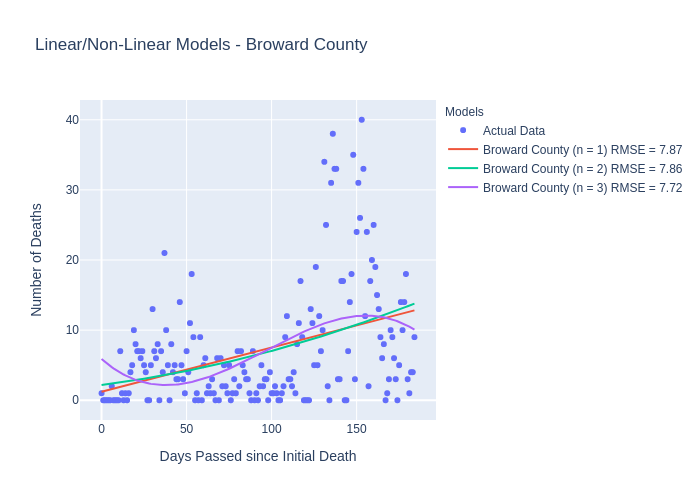

In [54]:
Image(filename = "./chris/images/task1.2/Broward County-deaths.png")

In [55]:
slope = dict_stats["Broward County_deaths_1"]["slope"]
rsquared = dict_stats["Broward County_deaths_1"]["R2"]
print("Stats of n = 1: slope: {:.2f}    R2: {:.2f}".format(slope, rsquared))

Stats of n = 1: slope: 0.06    R2: 0.16


In [56]:
print("Stats of n = 2: ", dict_stats["Broward County_deaths_2"])

Stats of n = 2:  {'skew': 1.483, 'Kurtosis': 5.558, 'R2': 0.1576889976327066}


In [57]:
print("Stats of n = 3: ", dict_stats["Broward County_deaths_3"])

Stats of n = 3:  {'skew': 1.298, 'Kurtosis': 4.93, 'R2': 0.18654930064414532}


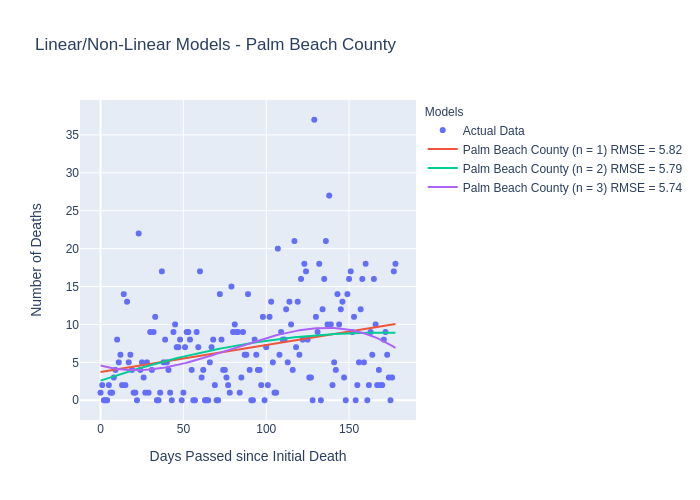

In [58]:
Image(filename = "./chris/images/task1.2/Palm Beach County-deaths.png")

In [59]:
slope = dict_stats["Palm Beach County_deaths_1"]["slope"]
rsquared = dict_stats["Palm Beach County_deaths_1"]["R2"]
print("Stats of n = 1: slope: {:.2f}    R2: {:.2f}".format(slope, rsquared))

Stats of n = 1: slope: 0.04    R2: 0.09


In [60]:
print("Stats of n = 2: ", dict_stats["Palm Beach County_deaths_2"])

Stats of n = 2:  {'skew': 1.179, 'Kurtosis': 5.762, 'R2': 0.09752635822470679}


In [61]:
print("Stats of n = 3: ", dict_stats["Palm Beach County_deaths_3"])

Stats of n = 3:  {'skew': 1.133, 'Kurtosis': 5.476, 'R2': 0.11382468900637788}


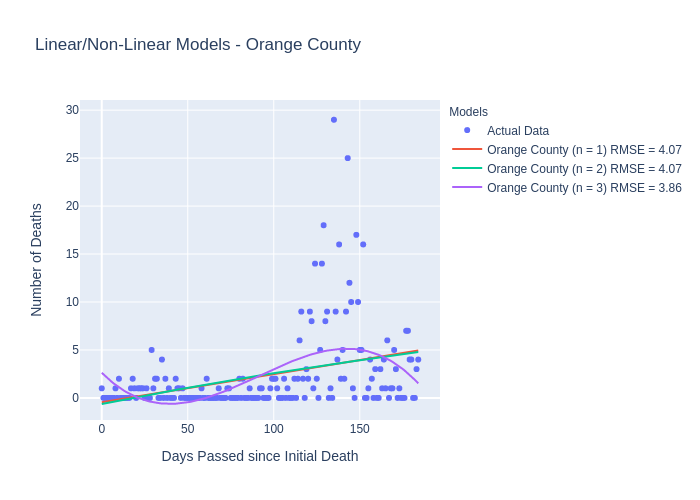

In [62]:
Image(filename = "./chris/images/task1.2/Orange County-deaths.png")

In [63]:
slope = dict_stats["Orange County_deaths_1"]["slope"]
rsquared = dict_stats["Orange County_deaths_1"]["R2"]
print("Stats of n = 1: slope: {:.2f}    R2: {:.2f}".format(slope, rsquared))

Stats of n = 1: slope: 0.03    R2: 0.13


In [64]:
print("Stats of n = 2: ", dict_stats["Orange County_deaths_2"])

Stats of n = 2:  {'skew': 3.046, 'Kurtosis': 15.609, 'R2': 0.1299562623838777}


In [65]:
print("Stats of n = 3: ", dict_stats["Orange County_deaths_3"])

Stats of n = 3:  {'skew': 2.711, 'Kurtosis': 14.454, 'R2': 0.2150064369708351}


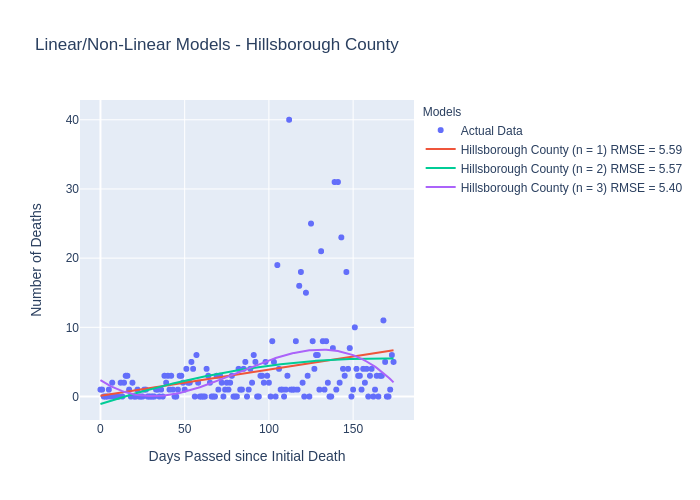

In [66]:
Image(filename = "./chris/images/task1.2/Hillsborough County-deaths.png")

In [67]:
slope = dict_stats["Hillsborough County_deaths_1"]["slope"]
rsquared = dict_stats["Hillsborough County_deaths_1"]["R2"]
print("Stats of n = 1: slope: {:.2f}    R2: {:.2f}".format(slope, rsquared))

Stats of n = 1: slope: 0.04    R2: 0.10


In [68]:
print("Stats of n = 2: ", dict_stats["Hillsborough County_deaths_2"])

Stats of n = 2:  {'skew': 3.335, 'Kurtosis': 16.971, 'R2': 0.11277449614123991}


In [69]:
print("Stats of n = 3: ", dict_stats["Hillsborough County_deaths_3"])

Stats of n = 3:  {'skew': 3.051, 'Kurtosis': 15.869, 'R2': 0.16496195675446124}


#### The graphs are listed in suspected descending order of performance, in other words, highest to lowest risk.

In [70]:
slope_sum = []
r2_sum = []
for county in top_5_counties:
    slope = (dict_stats[county + "_deaths_1"]["slope"])
    r2 = dict_stats[county + "_deaths_1"]["R2"]
    print((county + " n = 1 stats: ").ljust(35, " "), "slope: {:.2f}    R2 {:.2f}".format(slope, r2))
    slope_sum.append(slope)
    r2_sum.append(r2)
avg_slope = sum(slope_sum) / len(slope_sum)
avg_r2 = sum(r2_sum) / len(r2_sum)
print()
print("Average n = 1 stats: ".ljust(35, " "), "slope: {:.2f}    R2 {:.2f}".format(avg_slope, avg_r2))

Miami-Dade County n = 1 stats:      slope: 0.15    R2 0.22
Broward County n = 1 stats:         slope: 0.06    R2 0.16
Palm Beach County n = 1 stats:      slope: 0.04    R2 0.09
Orange County n = 1 stats:          slope: 0.03    R2 0.13
Hillsborough County n = 1 stats:    slope: 0.04    R2 0.10

Average n = 1 stats:                slope: 0.06    R2 0.14


#### From analysis of the n = 1 slopes we se that our top performer here is Miami-Dade County. We also see that Miami-Dade has the highest R2 and the best fit model for n = 1.

#### In general it appeares that the more spread out the data and the more aggressive the outliers the worse of a fit we get with the linear model. Miami-Dade is unique in having relatively few outliers and a strong density around its line of prediction.

In [71]:
list_sum_skew = []
list_sum_kurtosis = []
list_sum_r2 = []
for county in top_5_counties:
    skew = dict_stats[county + "_deaths_2"]["skew"]
    kurtosis = dict_stats[county + "_deaths_2"]["Kurtosis"]
    r2 = dict_stats[county + "_deaths_2"]["R2"]
    print((county + " n = 2 stats: ").ljust(35, " ") + "skew: {:.2f}    kurtosis: {:.2f}    R2: {:.2f}"\
          .format(skew, kurtosis, r2))
    list_sum_skew.append(skew)
    list_sum_kurtosis.append(kurtosis)
    list_sum_r2.append(r2)
avg_skew = sum(list_sum_skew) / len(list_sum_skew)
avg_kurtosis = sum(list_sum_kurtosis) / len(list_sum_kurtosis)
avg_r2 = sum(list_sum_r2) / len(list_sum_r2)
print()
print("Average Stats: ".ljust(35, " ") + "skew: {:.2f}    kurtosis: {:.2f}    R2: {:.2f}"\
      .format(avg_skew, avg_kurtosis, avg_r2))

Miami-Dade County n = 2 stats:     skew: 1.74    kurtosis: 10.00    R2: 0.24
Broward County n = 2 stats:        skew: 1.48    kurtosis: 5.56    R2: 0.16
Palm Beach County n = 2 stats:     skew: 1.18    kurtosis: 5.76    R2: 0.10
Orange County n = 2 stats:         skew: 3.05    kurtosis: 15.61    R2: 0.13
Hillsborough County n = 2 stats:   skew: 3.33    kurtosis: 16.97    R2: 0.11

Average Stats:                     skew: 2.16    kurtosis: 10.78    R2: 0.15


#### Analyzing n = 2 stats we see no trend with skew and kurtosis. We do however see that Miami-Dade is the top performer and it has the highest R2 value. 

#### We can assume that from our past observation, that the graph has few outliers, that increasing the complexity has helped the model and that it was not affected by a strong peak. This is confirmed by its moderate kurtosis as compared to the other counties.

In [72]:
list_sum_skew = []
list_sum_kurtosis = []
list_sum_r2 = []
for county in top_5_counties:
    skew = dict_stats[county + "_deaths_3"]["skew"]
    kurtosis = dict_stats[county + "_deaths_3"]["Kurtosis"]
    r2 = dict_stats[county + "_deaths_3"]["R2"]
    print((county + " n = 3 stats: ").ljust(35, " ") + "skew: {:.2f}    kurtosis: {:.2f}    R2: {:.2f}"\
          .format(skew, kurtosis, r2))
    list_sum_skew.append(skew)
    list_sum_kurtosis.append(kurtosis)
    list_sum_r2.append(r2)
avg_skew = sum(list_sum_skew) / len(list_sum_skew)
avg_kurtosis = sum(list_sum_kurtosis) / len(list_sum_kurtosis)
avg_r2 = sum(list_sum_r2) / len(list_sum_r2)
print()
print("Average Stats: ".ljust(35, " ") + "skew: {:.2f}    kurtosis: {:.2f}    R2: {:.2f}"\
      .format(avg_skew, avg_kurtosis, avg_r2))

Miami-Dade County n = 3 stats:     skew: 1.74    kurtosis: 9.88    R2: 0.24
Broward County n = 3 stats:        skew: 1.30    kurtosis: 4.93    R2: 0.19
Palm Beach County n = 3 stats:     skew: 1.13    kurtosis: 5.48    R2: 0.11
Orange County n = 3 stats:         skew: 2.71    kurtosis: 14.45    R2: 0.22
Hillsborough County n = 3 stats:   skew: 3.05    kurtosis: 15.87    R2: 0.16

Average Stats:                     skew: 1.99    kurtosis: 10.12    R2: 0.18


#### No trends found for skew. However, it is apparent that the kurtosis is slightly increasing and is correlationg with the R2.

#### Our conclusion for n = 3 is that counties with high kurtosis (high peakedness) are still seeing increase in R2 value by adding complexity.

#### Miami-Dade still is our top performer and has highest R2.

In [73]:
for county in top_5_counties:
    rmse1 = dict_rmse[county + " deaths"][1]
    rmse2 = dict_rmse[county + " deaths"][2]
    rmse3 = dict_rmse[county + " deaths"][3]
    print((county + " RMSE: ").ljust(30, " "), "(n = 1): {:.2f}    (n = 2): {:.2f}    (n = 3): {:.2f}"\
          .format(rmse1, rmse2, rmse3))

Miami-Dade County RMSE:        (n = 1): 14.28    (n = 2): 14.09    (n = 3): 14.08
Broward County RMSE:           (n = 1): 7.87    (n = 2): 7.86    (n = 3): 7.72
Palm Beach County RMSE:        (n = 1): 5.82    (n = 2): 5.79    (n = 3): 5.74
Orange County RMSE:            (n = 1): 4.07    (n = 2): 4.07    (n = 3): 3.86
Hillsborough County RMSE:      (n = 1): 5.59    (n = 2): 5.57    (n = 3): 5.40


#### For the RMSE we see that some models benefit little from adding more complexity. Adding complexity is not helping our model unless there is strong peakedness in the graph.

# Task 1.3: 

In [74]:
dict_state_conversion =\
{
	"AL" : "Alabama", "AK" : "Alaska", "AZ" : "Arizona", "AR" : "Arkansas", "CA" : "California", 
	"CO" : "Colorado", "CT" : "Connecticut", "DE" : "Delaware", "FL" : "Florida", 
	"GA" : "Georgia", "HI" : "Hawaii", "ID" : "Idaho", "IL" : "Illinois", 
	"IN" : "Indiana", "IA" : "Iowa", "KS" : "Kansas", "KY" : "Kentucky", 
	"LA" : "Louisiana", "ME" : "Maine", "MD" : "Maryland", "MA" : "Massachusetts", 
	"MI" : "Michigan", "MN" : "Minnesota", "MS" : "Mississippi", "MO" : "Missouri", 
	"MT" : "Montana", "NE" : "Nebraska", "NV" : "Nevada", "NH" : "New Hampshire", 
	"NJ" : "New Jersey", "NM" : "New Mexico", "NY" : "New York", "NC" : "North Carolina", 
	"ND" : "North Dakota", "OH" : "Ohio", "OK" : "Oklahoma", "OR" : "Oregon", 
	"PA" : "Pennsylvania", "RI" : "Rhode Island", "SC" : "South Carolina", "SD" : "South Dakota", 
	"TN" : "Tennessee", "TX" : "Texas", "UT" : "Utah", "VT" : "Vermont", 
	"VA" : "Virginia", "WA" : "Washington", "WV" : "West Virginia", "WI" : "Wisconsin", 
	"WY" : "Wyoming", 
}

#### We are told the respective hospitilization rate from cdc for each age group, we will simplify this and take the average (https://www.cdc.gov/mmwr/volumes/69/wr/mm6915e3.htm).

### Note: We have increased the hospitilization rate in calculations to 15% due to low performance.

In [75]:
hospitilization_rate = [.3, .1 , 2.5, 7.4, 12.2, 15.8, 17.2]
hospitilization_rate = np.round(sum(hospitilization_rate) / len(hospitilization_rate), 0) / 100
print("Hospitilization Rate: {:.2%}".format(hospitilization_rate))

Hospitilization Rate: 8.00%


#### We determined that the median stay in the hospital "... ranged from 5 to 29 days." and that we will use the median value of 17 in calculations (https://bmcmedicine.biomedcentral.com/articles/10.1186/s12916-020-01726-3).

#### Determining Median utilization for state of Florida.

#### Due to low performance we have increased the hospitilization rate to

In [76]:
def calculate_no_return_state(_state):
    hospitilization_rate = .15
    avg_stay = 17
    df_state = md.get_state_daily_cases(_state)
    df_state_hospital = cd.get_county_hospital().groupby(by = "STATE_NAME")\
    .get_group(dict_state_conversion[_state])
    utilization_rate = df_state_hospital.BED_UTILIZATION.dropna()\
        .apply(lambda x : x * 100000000).median() / 100000000
    total_hospital_beds = np.round(df_state_hospital.NUM_STAFFED_BEDS.sum()\
                        - (df_state_hospital.NUM_STAFFED_BEDS.sum() * utilization_rate), 2)
    for column in df_state.columns:
        if (df_state[column] == 0).all():
            del df_state[column]
        else:
            break
    x_values = range(0, len(df_state.columns))
    df_hospital_scenario = pd.DataFrame(index = x_values, columns = ["patients", "days_left"]).fillna(0)
    df_hospital_utilization = pd.DataFrame(index = x_values, columns = ["utilization_rate"]).fillna(0)
    for cases, index in zip(df_state.sum(axis = 0).values, df_hospital_scenario.index):
        df_hospital_scenario.days_left = df_hospital_scenario.days_left.apply(lambda x: x - 1 if (x > 0) else x)
        df_hospital_scenario.iloc[index, 0] = np.round(cases * hospitilization_rate)
        df_hospital_scenario.iloc[index, 1] = 12
        df_hospital_utilization.iloc[index, 0] =\
            df_hospital_scenario[df_hospital_scenario.days_left > 0].patients.sum() / total_hospital_beds
    line_plot = [1 for x in range(0, max(x_values))]
    return [go.Scatter(x = df_hospital_utilization.index,
                      y = df_hospital_utilization.utilization_rate,
                      mode = "lines",
                      name = "{} Hospital Utilization Rate".format(dict_state_conversion[_state])
                     ),
            go.Scatter(x = df_hospital_utilization.index,
                       y = line_plot,
                       mode = "lines",
                       name = "Point of No Return",
                      ),
            df_hospital_utilization,
            total_hospital_beds
           ]

In [77]:
for _state in ["NY", "FL", "NJ", "AZ", "NV"]:
    plot = calculate_no_return_state(_state)
    figure = go.Figure()
    figure.add_trace(plot[0])
    figure.add_trace(plot[1])
    figure.write_image("./chris/images/task1.3/{}-{}.png".format(_state, "utilization"))

In [78]:
figure = go.Figure()
max_len = 0
for x in dict_state_conversion.keys():
    plot = calculate_no_return_state(x)
    figure.add_trace(plot[0])
    cur_len = len(plot[1]['y'])
    if max_len < cur_len:
        max_len = cur_len
figure.add_trace(go.Scatter(
                x = [x for x in range(0, max_len)],
                y = [1 for x in range(0, max_len)],
                mode = "lines",
                name = "Point of No Return",
                           )
                )
figure.write_image("./chris/images/task1.3/{}-{}.png".format("states", "utilization"))

In [79]:
def print_top_performers():
    max_len = 0
    dict_hospital_utilization = {}
    dict_hospital_max_bed = {}
    for state in dict_state_conversion.keys():
        data = calculate_no_return_state(state)
        dict_hospital_utilization[state] = data[2].max()[0]
        dict_hospital_max_bed[state] = int(data[3])
    top_performers = pd.DataFrame(dict_hospital_utilization.items()).sort_values(by = 1, ascending = False)
    print("State".center(15, " ") + "Available Beds".center(15, " ") + "Max Utilization Rate".center(25, " "))
    for state in top_performers[0].values:
        print("{}".format(state).center(15, " ")\
              + "{}".format(dict_hospital_max_bed[state]).center(15, " ")\
              + "{:.3f}".format(dict_hospital_utilization[state]).center(25, " "))

# Utilize the hospital data to calculate the point of no return for a state. Use percentage occupancy / utilization to see which states are close and what their trend looks like.

### Florida Hospital Utilization

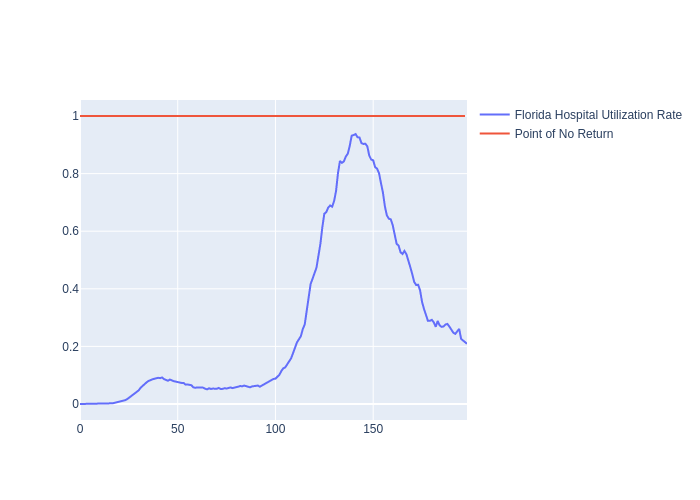

In [80]:
Image(filename = "./chris/images/task1.3/FL-utilization.png")

In [81]:
data = calculate_no_return_state(_state)

In [82]:
print("Max utilization rate: {:.2f}".format(data[2].max()[0]))
print("Available Hospital Beds: {}".format(int(data[3])))

Max utilization rate: 0.66
Available Hospital Beds: 3029


### All States Hospital Utilization

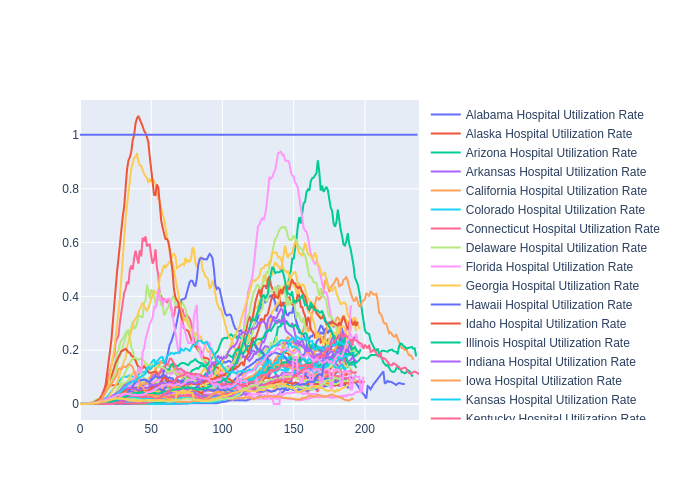

In [83]:
Image(filename = "./chris/images/task1.3/states-utilization.png")

In [84]:
print_top_performers()

     State      Available Beds   Max Utilization Rate  
       NY           16018               1.070          
       FL           21917               0.937          
       NJ            7462               0.932          
       AZ            7520               0.906          
       NV            3029               0.658          
       CT            2858               0.623          
       GA           10282               0.605          
       MD            3368               0.583          
       SC            5998               0.564          
       MA            7295               0.557          
       TX           35987               0.509          
       ID            2184               0.475          
       CA           36571               0.473          
       TN            8522               0.464          
       DE            842                0.444          
       LA            8821               0.440          
       RI            1504               0.426   

#### We see that New York, Florida, New Jersey, Arizona, and Nevada are our top 5 performers.

### New York Hospital Utilization

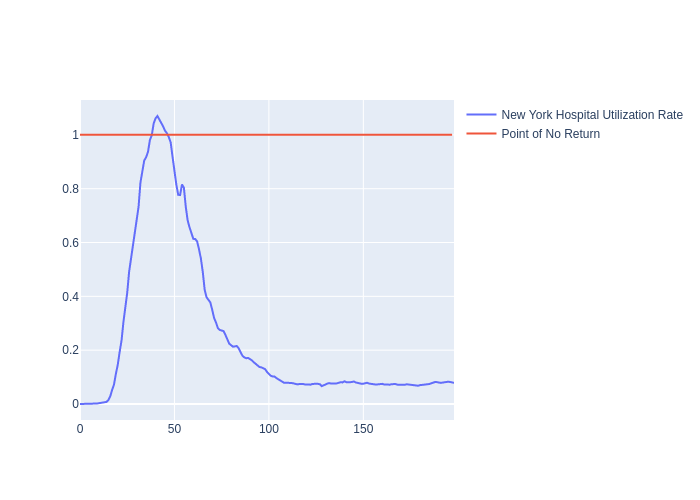

In [85]:
Image(filename = "./chris/images/task1.3/NY-utilization.png")

In [86]:
print("Available Beds: {} \nMax Utilization: {}".format(16018, 1.070))

Available Beds: 16018 
Max Utilization: 1.07


### Florida Hospital Utilization

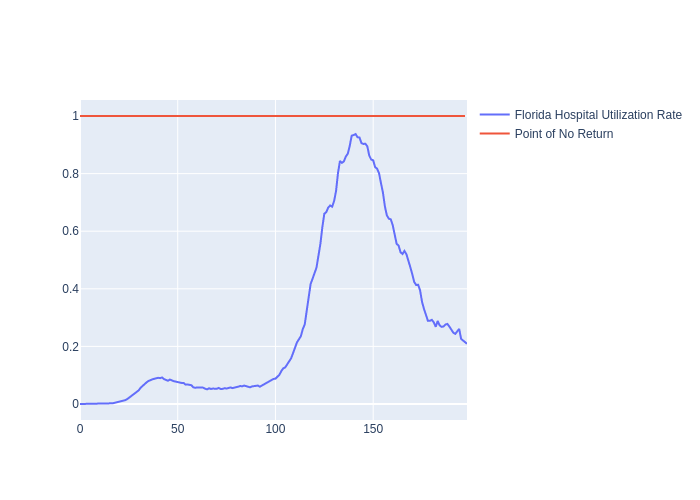

In [87]:
Image(filename = "./chris/images/task1.3/FL-utilization.png")

In [88]:
print("Available Beds: {} \nMax Utilization: {}".format(21917, 0.937))

Available Beds: 21917 
Max Utilization: 0.937


### New Jersey Hospital Utilization

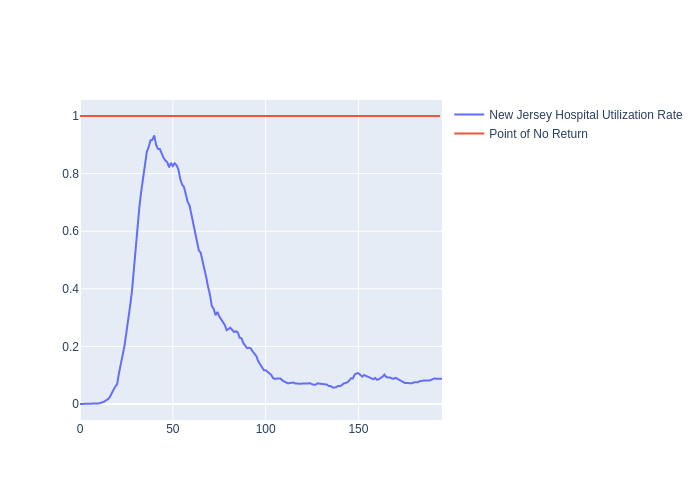

In [89]:
Image(filename = "./chris/images/task1.3/NJ-utilization.png")

In [90]:
print("Available Beds: {} \nMax Utilization: {}".format(7462, 0.932))

Available Beds: 7462 
Max Utilization: 0.932


### Arizona Hospital Utilization

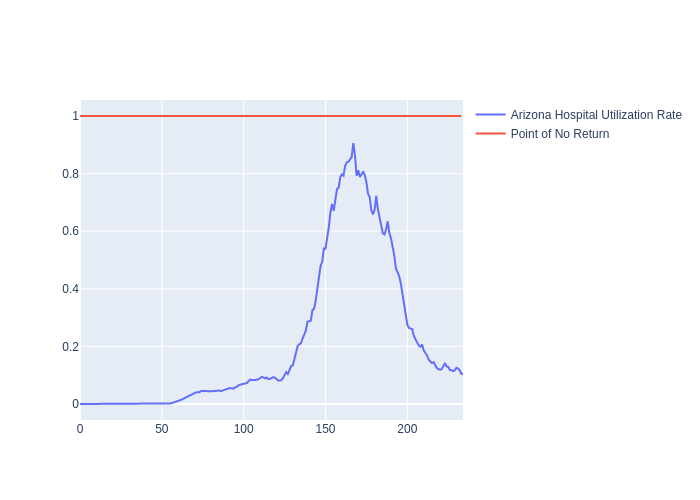

In [91]:
Image(filename = "./chris/images/task1.3/AZ-utilization.png")

In [92]:
print("Available Beds: {} \nMax Utilization: {}".format(7520, 0.906))

Available Beds: 7520 
Max Utilization: 0.906


### Nevada Hospital Utilization

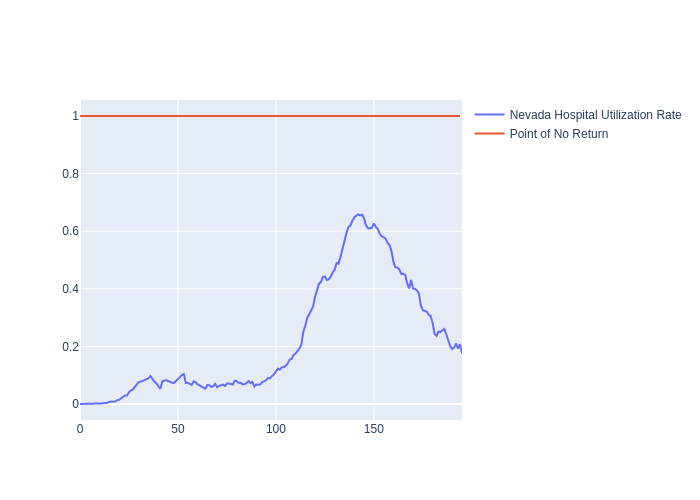

In [93]:
Image(filename = "./chris/images/task1.3/NV-utilization.png")

In [94]:
print("Available Beds: {} \nMax Utilization: {}".format(3029, 0.658))

Available Beds: 3029 
Max Utilization: 0.658


# Task 1.4: 

In [119]:
import warnings
warnings.filterwarnings("ignore")

In [346]:
def get_state_weekly(_state):
    df_state = md.get_state_weekly_cases(_state)
    list_index = []
    list_data = []
    for week in df_state.index.get_level_values(1).unique():
        list_index.append(week)
        weekly_cases = 0
        for county in df_state.index.get_level_values(0).unique():
            weekly_cases += df_state.loc[county, week].cases
        list_data.append(weekly_cases)
    df_weekly_data = pd.DataFrame(index = [list_index])
    df_weekly_data["cases"] = list_data
    return df_weekly_data

## Decision Tree

In [1344]:
def decision_tree_one_week(_state):
    df_state = md.get_state_daily_cases(_state)
    x_data = []
    y_data = []
    df_state = df_state.sum(axis = 0)
    len_columns = (len(df_state) // 7) - 1
    for row in range(0, len_columns):
        x_data.append(df_state.values[row * 7:(row + 1) * 7])
        y_data.append(df_state.values[(row + 1) * 7])
    decision_tree = tree.DecisionTreeClassifier()
    decision_tree = decision_tree.fit(x_data, y_data)
    week_advance_y_predicted = decision_tree.predict(np.array([ 0, 1, 0, 4, 3, 5, 11]).reshape(1, -1))
    actual_data = df_state[-9:-2]
    prior_data = df_state
    x_predicted = df_state[-14:-7].values
    y_predicted = []
    x_temp = x_predicted
    for x in range(0, 7):
        week_advance_y_predicted = decision_tree.predict(x_temp.reshape(1, -1))
        x_temp = np.append(x_temp[1:], (week_advance_y_predicted))
        y_predicted.append(week_advance_y_predicted[0])
    figure = go.Figure()
    figure.add_trace(go.Scatter(x = [x for x in range(0, len(df_state) - 2)],
                                y = df_state.values,
                                mode = "lines",
                                name = "Actual Trend",
                               )
                    )
    figure.add_trace(go.Scatter(x = [x for x in range(len(df_state) - 9, len(df_state) - 2)],
                                y = y_predicted,
                                mode = "lines",
                                name = "Predicted Trend",
                               )
                    )
    figure.write_image("./chris/images/task1.4/{}-{}.png".format(_state, "DECISION"))
    return smt.rmse(actual_data.values, y_predicted).sum()

## Arima Model

In [716]:
df_florida = get_state_weekly(_state)

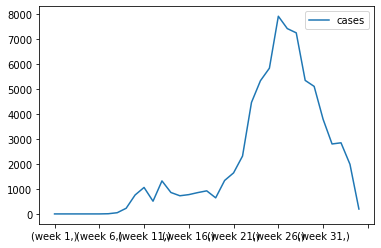

In [453]:
df_florida.plot()
pyplot.show()

#### Through trial and error we will choose order of difference of 0, which provides the lowest RMSE (0: 9540, 1: 11051, 2: 13036).

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

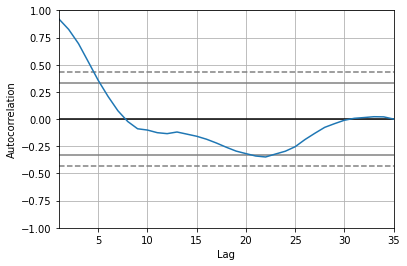

In [454]:
autocorrelation_plot(df_florida)

#### We see a coorelation for the first 8 data points, we will use this for our lag.

In [644]:
display(get_state_weekly("FL"))

,cases
week 1,0
week 2,0
week 3,0
week 4,0
...,...
week 32,25295
week 33,18932
week 34,18423
week 35,2345


In [462]:
def arima_modeling(_state):
    df_weekly_data = get_state_weekly(_state)
    x_values = [x[0] for x in df_weekly_data.values]
    size = int(len(x_values) * .66)
    train_data = x_values[0:size]
    test_data = x_values[size:]
    history = train_data
    predictions = []
    for x in range(0, len(test_data)):
        #model = ARIMA(history, order = (15, 0, 0))
        model = ARIMA(history, order = (8, 0, 0))
        model_fit = model.fit()
        output = model_fit.forecast(disp = 0)
        yhat = output[0]
        predictions.append(yhat)
        obs = test_data[x]
        history.append(obs)
    error = smt.rmse(test_data, predictions).sum()
    figure = go.Figure()
    figure.add_trace(go.Scatter(
                            x = [x for x in range(0, len(test_data))],
                            y = test_data,
                            mode = "lines",
                            name = "Actual Trend",
                               )
                    )
    figure.add_trace(go.Scatter(
                            x = [x for x in range(0, len(predictions))],
                            y = predictions,
                            mode = "lines",
                            name = "Predicted Trend",
                               )
                    )
    figure.write_image("./chris/images/task1.4/{}-{}.png".format(_state, "ARIMA"))
    return error


# Utilize decision tree, random forest, and ARIMA (https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/) based models to compare and contrast the performance of each. X-variable is the previous weeks data, Y-variable is current week data. So you are predicting one week in advance. Calculate RMSE error. This is just based on number of cases. 

## Decision Tree

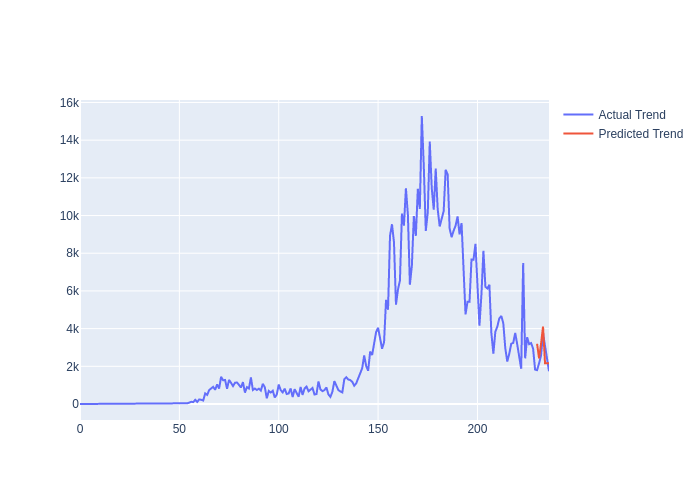

In [1355]:
Image(filename = "./chris/images/task1.4/FL-DECISION.png")

In [1356]:
print("RMSE: {:.2f}".format(740.18))

RMSE: 740.18


## Random Forest

In [ ]:
Image(filename = "./chris/images/task1.3/AZ-utilization.png")

## ARIMA

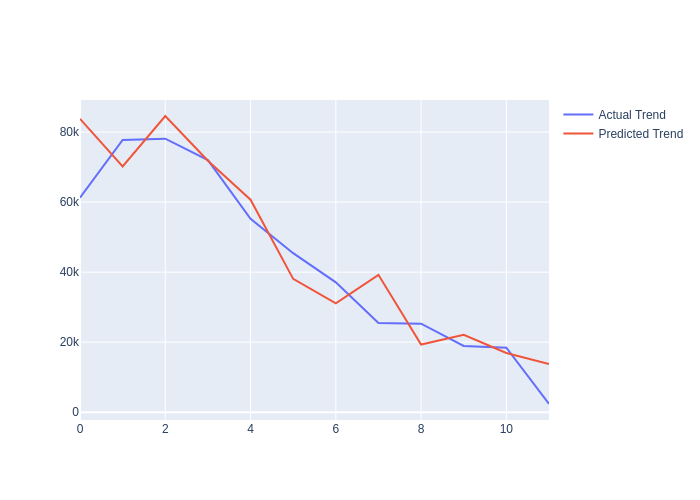

In [464]:
_state = "FL"
rmse = arima_modeling(_state)
Image(filename = "./chris/images/task1.4/{}-ARIMA.png".format(_state))

In [467]:
print("RMSE error: {:.2f}".format(rmse))

RMSE error: 9540.28


# Task 1.5
# Use 5 different variables from the enrichment data to predict the spread rate (cases and deaths) of COVID-19 in a county. Compare Random Forest and Decision Trees (RMSE error).

## For example, percentage of population in certain age-group, socio-economic status, public transportation, work from home, etc.

## Show the relative importance of variables and explain why. 